In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix
import nltk

import pickle

In [47]:
#Load in data and split for train and test sets
df = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(df['clean_text_sl'], df['Annotation'], test_size=0.25, random_state=12)
                                                       
df.head(5)

,id,text,Annotation,clean_text,clean_text_sl,Hate
0,5.969655e+17,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0
1,5.758918e+17,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0
2,5.952595e+17,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0
3,5.723449e+17,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0
4,5.681320e+17,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0


In [48]:
#create count matrix
counts = CountVectorizer()
count_train = counts.fit_transform(X_train)
count_test = counts.transform(X_test)

## Default LR

In [49]:
default_LR = LogisticRegression(penalty='l2', dual=False, C=1, class_weight=None, 
                                solver='lbfgs', random_state=12)

In [50]:
# train classifier
print("training...")
default_LR.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
default_LR_test_preds = default_LR.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [51]:
LR_metrics = {}
default_LR_precision = precision_score(y_test, default_LR_test_preds, average='macro')
default_LR_recall = recall_score(y_test, default_LR_test_preds, average='macro')
default_LR_macro_f1_score = f1_score(y_test, default_LR_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(default_LR_precision))
print('Recall: {:.3}'.format(default_LR_recall))
print('Macro F1 Score: {:.3}'.format(default_LR_macro_f1_score))

LR_metrics['Default LR'] = {'precision': default_LR_precision, 'recall': default_LR_recall, 
                            'macro_f1': default_LR_macro_f1_score}

Model evaluation metrics
Precision: 0.797
Recall: 0.619
Macro F1 Score: 0.683


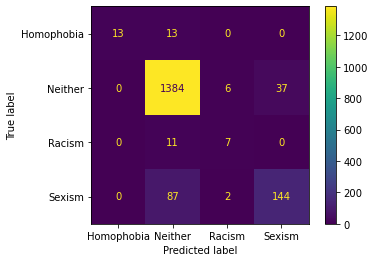

In [52]:
plot_confusion_matrix(default_LR, count_test, y_test)

## Grid Search LR

In [53]:
default_grid_LR = LogisticRegression(penalty='l2', dual=False, C=1, class_weight=None, 
                                solver='lbfgs', random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'penalty': ['l1', 'l2', 'elasticnet'],  
              'dual': [True, False], 
              'C': [1, 10, 30],
              'class_weight': [None, 'balanced'],
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']}

# grid search with f1 being the performance metric
grid_LR = GridSearchCV(default_grid_LR, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
grid_LR.fit(count_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs .....
[CV]  C=1, class_weight=None, d

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on t

[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.620, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear .
[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.621, total=   0.1s
[CV] C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear .
[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.587, total=   0.1s
[CV] C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear .
[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.643, total=   0.1s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, du

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=lbfgs 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=lbfgs 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=lbfgs 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=sag 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=sag 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.713, total=   1.2s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.662, total=   1.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.696, total=   1.3s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.754, total=   1.3s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.666, total=   1.3s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.722, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.698, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.675, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.717, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.682, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l2, sol

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.619, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.636, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.622, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.640, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.674, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.616, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.651, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.662, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.639, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.633, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.620, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.621, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.587, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.643, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=elastic

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs .
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs .
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs .
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs .
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, so

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.661, total=   1.5s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.784, total=   1.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.665, total=   1.4s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.743, total=   1.4s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.763, total=   1.4s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.715, total=   3.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.799, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.689, total=   3.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.768, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.776, total=   3.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.682, total=   0.2s
[CV] C=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.696, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.800, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.699, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.766, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.695, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.697, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.759, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.764, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.715, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.765, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.682, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.765, total=   0.1s
[CV] C=1, class_weigh

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=lbfgs ....
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=lbfgs, score=nan, total=   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.679, total=   0.1s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.637, total=   0.1s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.706, total=   0.1s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.704, total=   0.2s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.715, total=  10.1s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.707, total=   6.3s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.666, total=   9.8s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.711, total=  10.2s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.745, total=  10.4s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.688, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.712, total=   1.7s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.692, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.759, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.687, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.701, total=   0.4s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.675, total=   0.4s
[CV] C=10, class_weight=None, dual=False

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.701, total=   0.6s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.675, total=   0.6s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.665, total=   0.5s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.715, total=   0.6s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.694, total=   0.6s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.722, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.662, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.654, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.691, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.697, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.716, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.660, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.670, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.697, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.697, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.681, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.679, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.637, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.706, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.704, total=   0.1s
[CV] C=10, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=lbfgs 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=lbfgs 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=lbfgs, score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.713, total=   0.1s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.756, total=   0.1s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.685, total=   0.2s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.765, total=   0.2s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.761, total=   0.2s
[CV] C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.691, total=   9.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.773, total=   6.4s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.692, total=   9.9s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.755, total=   9.9s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.792, total=   9.8s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.695, total=   2.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.756, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.691, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.777, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.663, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.695, total=   0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.695, total=   0.5s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.776, total=   0.5s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.690, total=   0.6s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.781, total=   0.5s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.759, total=   0.5s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.703, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.755, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.686, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.761, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.811, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.691, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.758, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.689, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.758, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.788, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.713, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.756, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.685, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.765, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.761, total=   0.1s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV]  C=10, class_weight=balanced, dual=False, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=elasticnet, solver=sag 
[CV]  C=10, class_weight=balanced, dual=False, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=elasticnet, solver=sag 
[CV]  C=10, class_weight=balanced, dual=False, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=elasticnet, solver=sag 
[CV]  C=10, class_weight=balanced, dual=False, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=elasticnet, solver=sag 
[CV]  C=10, class_weight=balanced, dual=False, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=elasticnet, solver=saga 
[CV]  C=10, class_weight=balanced, dual=False, penalty=elasticnet, solver=saga, score=na

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.688, total=   0.2s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.673, total=   0.2s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.658, total=   0.2s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.706, total=   0.2s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.711, total=   0.2s
[CV] C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=Tr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.716, total=  19.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.697, total=  11.2s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.664, total=  17.4s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.696, total=  17.1s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.709, total=  17.3s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.677, total=   1.7s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.723, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.693, total=   1.7s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.765, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.675, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.689, total=   0.3s
[CV] C=30, class_weight=None, dual=False

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.689, total=   0.5s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.668, total=   0.5s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.669, total=   0.4s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.703, total=   0.5s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.696, total=   0.4s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.713, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.694, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.653, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.689, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.696, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.716, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.692, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.672, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.695, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.691, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.682, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.673, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.659, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.706, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.701, total=   0.1s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.754, total=   0.1s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.694, total=   0.2s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.766, total=   0.1s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.752, total=   0.2s
[CV] C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.689, total=  15.7s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.774, total=   9.8s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.688, total=  15.4s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.760, total=  15.6s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.794, total=  16.4s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.703, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.747, total=   0.1s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "



[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.691, total=   1.5s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.787, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.694, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.696, total=   0.3s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.761, total=   0.3s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weigh

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.696, total=   0.5s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.761, total=   0.6s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.689, total=   0.5s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.782, total=   0.5s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.767, total=   0.5s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.686, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.724, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.697, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.763, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.812, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.691, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.756, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.681, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.760, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.795, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.701, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.754, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.693, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.766, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.752, total=   0.1s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, random_state=12),
             param_grid={'C': [1, 10, 30], 'class_weight': [None, 'balanced'],
                         'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear']},
             scoring='f1_macro', verbose=3)

In [54]:
#print best score obtained and the parameters which obtained it
print('Macro F1 Score:', grid_LR.best_score_)
print('Best Hyperparameters:', grid_LR.best_params_)
print('Model object with best parameters: ')
print(grid_LR.best_estimator_)

Macro F1 Score: 0.7494947367426203
Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'dual': False, 'penalty': 'l1', 'solver': 'liblinear'}
Model object with best parameters: 
LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=12,
                   solver='liblinear')


In [55]:
# train classifier
print("training...")
grid_LR.best_estimator_.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
LR_test_preds = grid_LR.best_estimator_.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [56]:
grid_LR_precision = precision_score(y_test, LR_test_preds, average='macro')
grid_LR_recall = recall_score(y_test, LR_test_preds, average='macro')
grid_LR_macro_f1_score = f1_score(y_test, LR_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(grid_LR_precision))
print('Recall: {:.3}'.format(grid_LR_recall))
print('Macro F1 Score: {:.3}'.format(grid_LR_macro_f1_score))

LR_metrics['Grid LR'] = {'precision': grid_LR_precision, 'recall': grid_LR_recall, 
                            'macro_f1': grid_LR_macro_f1_score}

Model evaluation metrics
Precision: 0.739
Recall: 0.768
Macro F1 Score: 0.73


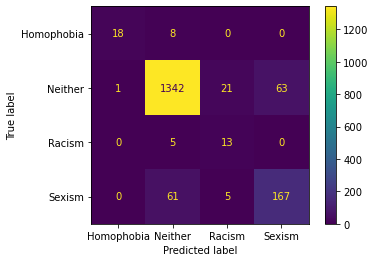

In [57]:
plot_confusion_matrix(grid_LR, count_test, y_test)

In [58]:
#compare parameters
results = pd.DataFrame.from_dict(LR_metrics, orient='index')
results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\LR_count_results_multi",
               index=False)
results

,precision,recall,macro_f1
Default LR,0.797000,0.619195,0.683464
Grid LR,0.738632,0.767926,0.730399


## without S/L preprocessing

In [59]:
#Load in data and split for train and test sets
df = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Annotation'], test_size=0.25, random_state=12)
                                                       
df.head(5)

,id,text,Annotation,clean_text,clean_text_sl,Hate
0,5.969655e+17,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0
1,5.758918e+17,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0
2,5.952595e+17,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0
3,5.723449e+17,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0
4,5.681320e+17,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0


In [60]:
#create count matrix
counts = CountVectorizer()
count_train = counts.fit_transform(X_train)
count_test = counts.transform(X_test)

In [61]:
default_LR = LogisticRegression(penalty='l2', dual=False, C=1, class_weight=None, 
                                solver='lbfgs', random_state=12)

In [62]:
# train classifier
print("training...")
default_LR.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
default_LR_test_preds = default_LR.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [63]:
default_LR_precision = precision_score(y_test, default_LR_test_preds, average='macro')
default_LR_recall = recall_score(y_test, default_LR_test_preds, average='macro')
default_LR_macro_f1_score = f1_score(y_test, default_LR_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(default_LR_precision))
print('Recall: {:.3}'.format(default_LR_recall))
print('Macro F1 Score: {:.3}'.format(default_LR_macro_f1_score))

LR_metrics['Default LR - no S/L preprocessing'] = {'precision': default_LR_precision, 'recall': default_LR_recall, 
                            'macro_f1': default_LR_macro_f1_score}

Model evaluation metrics
Precision: 0.774
Recall: 0.552
Macro F1 Score: 0.614


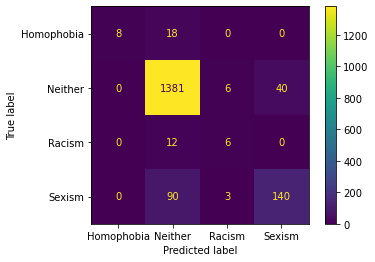

In [64]:
plot_confusion_matrix(default_LR, count_test, y_test)

In [65]:
default_grid_LR = LogisticRegression(penalty='l2', dual=False, C=1, class_weight=None, 
                                solver='lbfgs', random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'penalty': ['l1', 'l2', 'elasticnet'],  
              'dual': [True, False], 
              'C': [1, 10, 30],
              'class_weight': [None, 'balanced'],
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']}

# grid search with f1 being the performance metric
grid_LR = GridSearchCV(default_grid_LR, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
grid_LR.fit(count_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs .....
[CV]  C=1, class_weight=None, d

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on t

[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.563, total=   0.1s
[CV] C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear .
[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.623, total=   0.1s
[CV] C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear .
[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.529, total=   0.1s
[CV] C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear .
[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.583, total=   0.1s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, du

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.660, total=   1.4s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.680, total=   1.2s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.666, total=   1.4s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.602, total=   1.5s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.676, total=   1.5s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.653, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.660, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.674, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.674, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.663, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, sol

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.643, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.558, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.633, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.567, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.574, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.651, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.558, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.625, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.585, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.599, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.589, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.563, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.623, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.529, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.583, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=elastic

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV] C=1, class_weight=balanced, dual=True, penalty=l1, solver=lbfgs .
[CV]  C=1, class_weight=balanced, dual=True, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l1, solver=lbfgs .
[CV]  C=1, class_weight=balanced, dual=True, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l1, solver=lbfgs .
[CV]  C=1, class_weight=balanced, dual=True, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l1, solver=sag ...
[CV]  C=1, class_weight=balanced, dual=True, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l1, solver=sag ...
[CV]  C=1, class_weight=balanced, dual=True, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l1, solver=sag ...
[CV]  C=1, class_weight=balanced, dual=True, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.696, total=   1.5s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.802, total=   1.3s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.677, total=   1.5s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.718, total=   1.5s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.784, total=   1.5s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.721, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.743, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.693, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.762, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.798, total=   0.1s
[CV] C=1, cl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.743, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.766, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.670, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.700, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.727, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.771, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.665, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.706, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.783, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.729, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.710, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.673, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.628, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.746, total=   0.1s
[CV] C=1, cl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV] C=10, class_weight=None, dual=True, penalty=l1, solver=saga .....
[CV]  C=10, class_weight=None, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l1, solver=saga .....
[CV]  C=10, class_weight=None, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.687, total=   0.1s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.648, total=   0.1s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.610, total=   0.2s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.570, total=   0.2s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.607, total=   0.2s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=Tr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.720, total=  11.2s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.661, total=   7.8s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.642, total=  11.0s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.597, total=  10.8s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.605, total=  10.6s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.693, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.689, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.681, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.730, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.662, total=   0.1s
[CV] C=10, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.699, total=   0.5s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.628, total=   0.6s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.606, total=   0.6s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.573, total=   0.6s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.590, total=   0.5s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.698, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.638, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.625, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.609, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.615, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.721, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.657, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.633, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.572, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.621, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.686, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.648, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.610, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.570, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.607, total=   0.1s
[CV] C=10, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=sag 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=sag 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=sag 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=sag 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=saga 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=None

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.719, total=   0.1s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.696, total=   0.1s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.648, total=   0.1s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.668, total=   0.1s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.727, total=   0.2s
[CV] C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.717, total=   8.3s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.730, total=   5.7s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.650, total=   8.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.663, total=   8.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.790, total=   8.4s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.707, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.729, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.678, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.755, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.710, total=   0.1s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.740, total=   0.5s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.721, total=   0.6s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.669, total=   0.6s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.686, total=   0.5s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.748, total=   0.6s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.704, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.696, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.672, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.674, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.723, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.723, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.688, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.652, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.661, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.776, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.719, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.696, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.648, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.668, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.741, total=   0.1s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=30, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l1, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l1, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l1, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l1, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l1, solver=lbfgs ....
[CV]  C=30, class_weight=None, dual=True, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l1, solver=lbfgs .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.682, total=   0.2s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.650, total=   0.2s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.620, total=   0.2s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.602, total=   0.2s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.634, total=   0.2s
[CV] C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=Tr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.719, total=  18.1s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.659, total=  13.5s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.636, total=  17.9s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.598, total=  17.8s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.622, total=  18.5s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.682, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.684, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.693, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.717, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.692, total=   2.9s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.691, total=   0.4s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.648, total=   0.4s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.630, total=   0.4s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.580, total=   0.4s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.591, total=   0.5s
[CV] C=30, class_weight=None, dual=False

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.692, total=   0.6s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.648, total=   0.6s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.630, total=   0.6s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.580, total=   0.6s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.591, total=   0.6s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.714, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.638, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.620, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.608, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.614, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.718, total=   0.3s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.657, total=   0.3s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.633, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.610, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.619, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.683, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.650, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.630, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.603, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.634, total=   0.1s
[CV] C=30, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV] C=30, class_weight=None, dual=False, penalty=elasticnet, solver=sag 
[CV]  C=30, class_weight=None, dual=False, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=elasticnet, solver=saga 
[CV]  C=30, class_weight=None, dual=False, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=elasticnet, solver=saga 
[CV]  C=30, class_weight=None, dual=False, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=elasticnet, solver=saga 
[CV]  C=30, class_weight=None, dual=False, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=elasticnet, solver=saga 
[CV]  C=30, class_weight=None, dual=False, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=elasticnet, solver=saga 
[CV]  C=30, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.721, total=   0.2s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.694, total=   0.2s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.657, total=   0.2s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.702, total=   0.2s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.721, total=   0.2s
[CV] C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.725, total=  15.7s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.713, total=  11.3s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.652, total=  16.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.661, total=  16.6s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.776, total=  15.8s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.692, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.709, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.689, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.746, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.688, total=   0.1s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.737, total=   0.8s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.716, total=   0.7s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.667, total=   0.6s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.710, total=   0.6s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.733, total=   0.6s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.693, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.648, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.656, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.674, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.706, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.727, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.709, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.653, total=   0.3s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.660, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.721, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.694, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.656, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.702, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.721, total=   0.1s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, random_state=12),
             param_grid={'C': [1, 10, 30], 'class_weight': [None, 'balanced'],
                         'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear']},
             scoring='f1_macro', verbose=3)

In [66]:
#print best score obtained and the parameters which obtained it
print('Macro F1 Score:', grid_LR.best_score_)
print('Best Hyperparameters:', grid_LR.best_params_)
print('Model object with best parameters: ')
print(grid_LR.best_estimator_)

Macro F1 Score: 0.743414295943096
Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'dual': False, 'penalty': 'l1', 'solver': 'liblinear'}
Model object with best parameters: 
LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=12,
                   solver='liblinear')


In [67]:
# train classifier
print("training...")
grid_LR.best_estimator_.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
LR_test_preds = grid_LR.best_estimator_.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [68]:
grid_LR_precision = precision_score(y_test, LR_test_preds, average='macro')
grid_LR_recall = recall_score(y_test, LR_test_preds, average='macro')
grid_LR_macro_f1_score = f1_score(y_test, LR_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(grid_LR_precision))
print('Recall: {:.3}'.format(grid_LR_recall))
print('Macro F1 Score: {:.3}'.format(grid_LR_macro_f1_score))

LR_metrics['Grid LR  - no S/L preprocessing'] = {'precision': grid_LR_precision, 'recall': grid_LR_recall, 
                            'macro_f1': grid_LR_macro_f1_score}

Model evaluation metrics
Precision: 0.719
Recall: 0.724
Macro F1 Score: 0.698


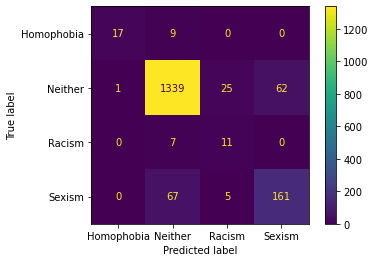

In [69]:
plot_confusion_matrix(grid_LR, count_test, y_test)

In [70]:
#compare parameters
results = pd.DataFrame.from_dict(LR_metrics, orient='index')
results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\LR_count_results_multi",
               index=False)
results

,precision,recall,macro_f1
Default LR,0.797000,0.619195,0.683464
Grid LR,0.738632,0.767926,0.730399
Default LR - no S/L preprocessing,0.774458,0.552412,0.613874
Grid LR - no S/L preprocessing,0.719085,0.723569,0.697932
